In [ ]:
!pip install rioxarray geopandas earthpy

In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

In [2]:
sns.set(font_scale=1.5)
sns.set_style("white")

In [4]:
data = et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [5]:
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_land", "ne_110m_land.shp")

worldBound = gpd.read_file(worldBound_path)

worldBound.head()

,featurecla,scalerank,geometry
0,Country,1,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Country,1,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Country,1,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Country,1,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Country,1,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


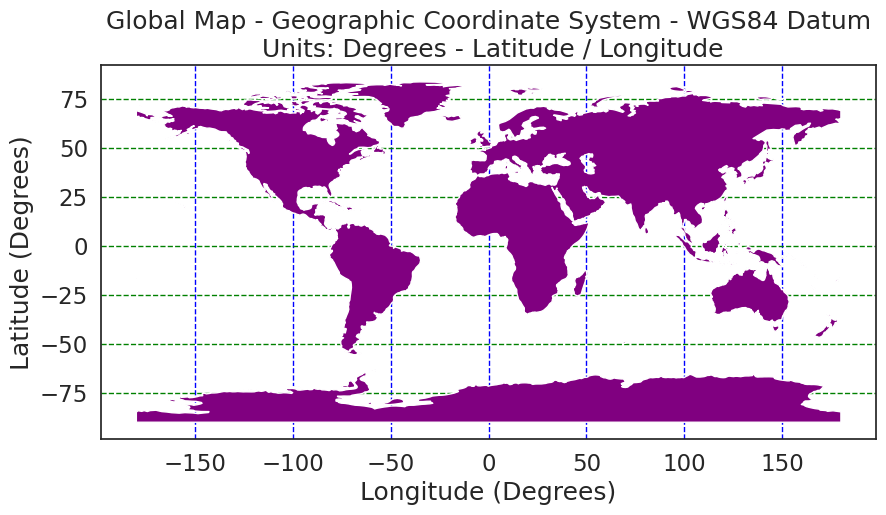

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
worldBound.plot(color="purple", ax=ax)

ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)", title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

ax.set_axisbelow(True)
ax.yaxis.grid(color="green", linestyle="dashed")
ax.xaxis.grid(color="blue", linestyle="dashed")

plt.show()

In [7]:
add_points = np.array([[-105.2519, 40.0274], 
                       [-118.1937, 33.7701], 
                       [-115.9010, 33.8734]])

city_locations = [Point(xy)for xy in add_points]
city_locations 

[<POINT (-105.252 40.027)>,
 <POINT (-118.194 33.77)>,
 <POINT (-115.901 33.873)>]

In [8]:
city_locations = gpd.GeoDataFrame(city_locations, columns=["geometry"], crs=worldBound.crs)
city_locations

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (-118.19370 33.77010)
2,POINT (-115.90100 33.87340)


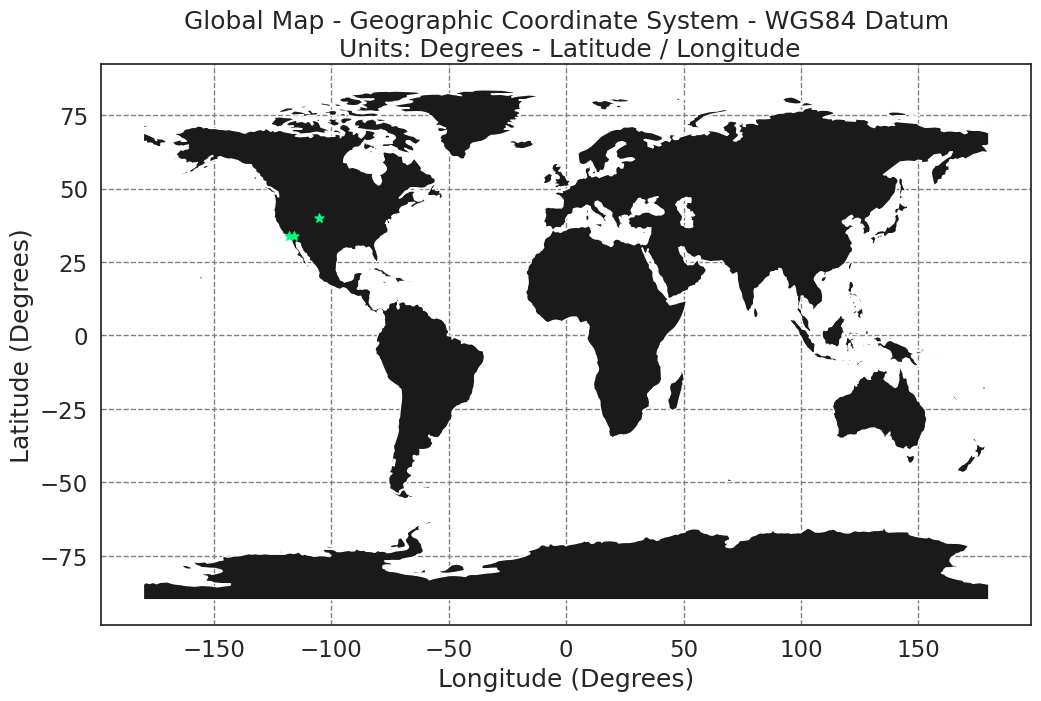

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

worldBound.plot(figsize=(10,5), color="k", ax=ax)

city_locations.plot(ax=ax, color="springgreen", marker="*", markersize=45)

ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)", title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.xaxis.grid(color="gray", linestyle="dashed")
plt.show()

In [10]:

graticule_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_graticules_all", "ne_110m_graticules_15.shp")

graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")

bbox = gpd.read_file(bbox_path)

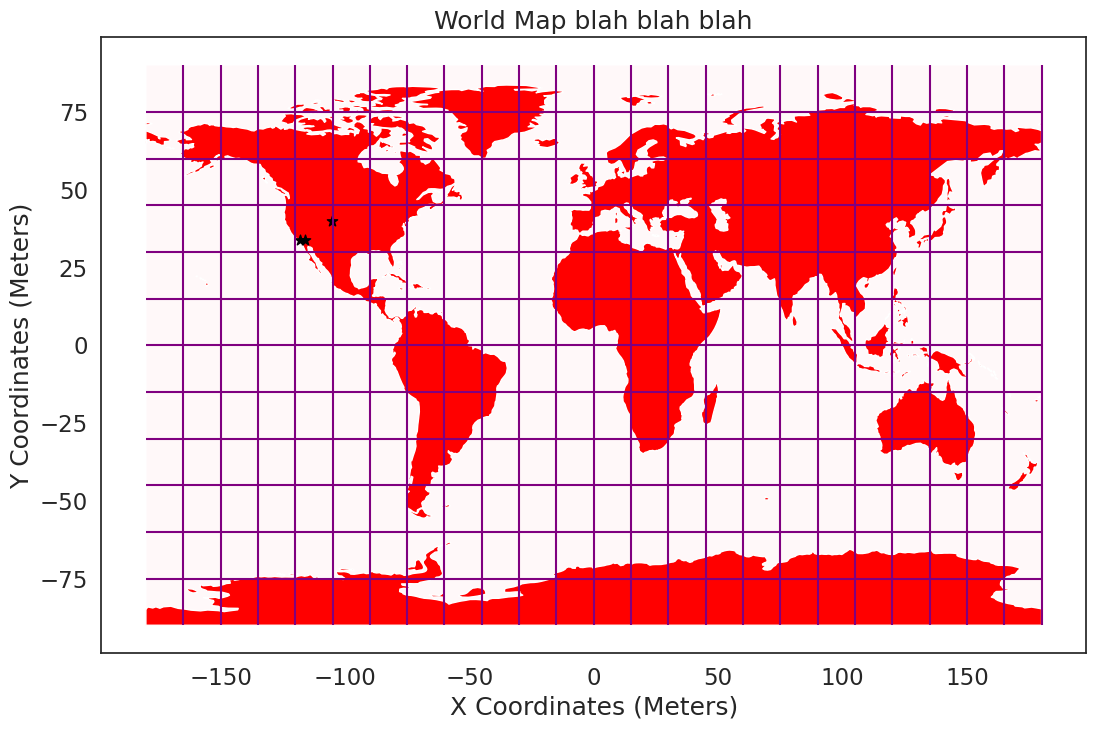

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

bbox.plot(ax=ax, alpha=.1, color="pink")

graticule.plot(ax=ax, color="purple")

worldBound.plot(ax=ax, color="red")

city_locations.plot(ax=ax, markersize=60, color="black", marker="*")

ax.set(title="World Map blah blah blah", xlabel="X Coordinates (Meters)", ylabel = "Y Coordinates (Meters)")

plt.show()

In [12]:
worldBound_robin = worldBound.to_crs("+proj=robin")
graticule_robin = graticule.to_crs("+proj=robin")

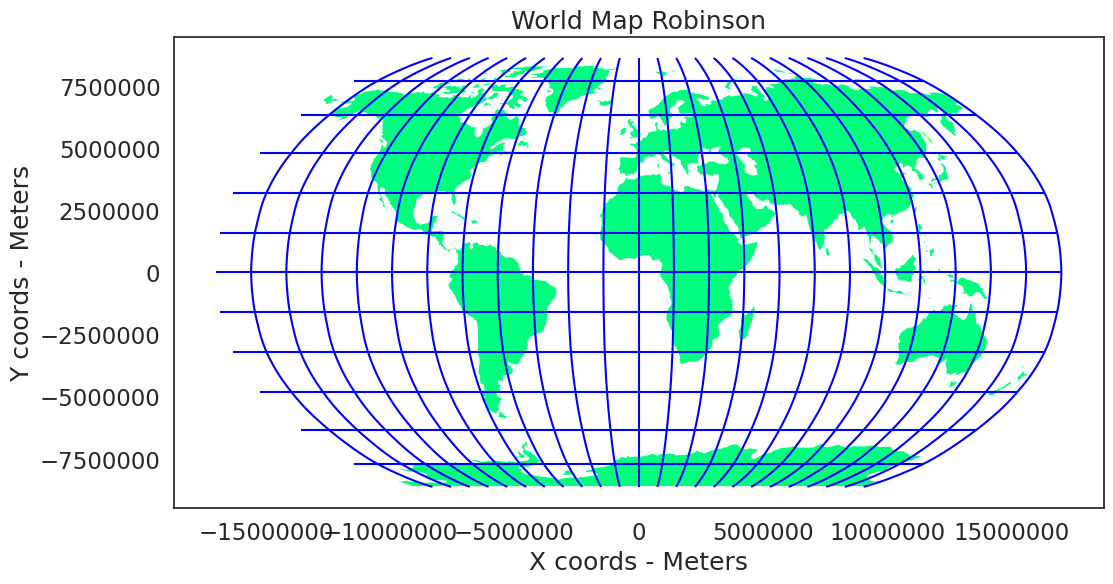

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax, color="springgreen")

graticule_robin.plot(ax=ax, color="blue")

ax.set(title="World Map Robinson", xlabel="X coords - Meters", ylabel="Y coords - Meters")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

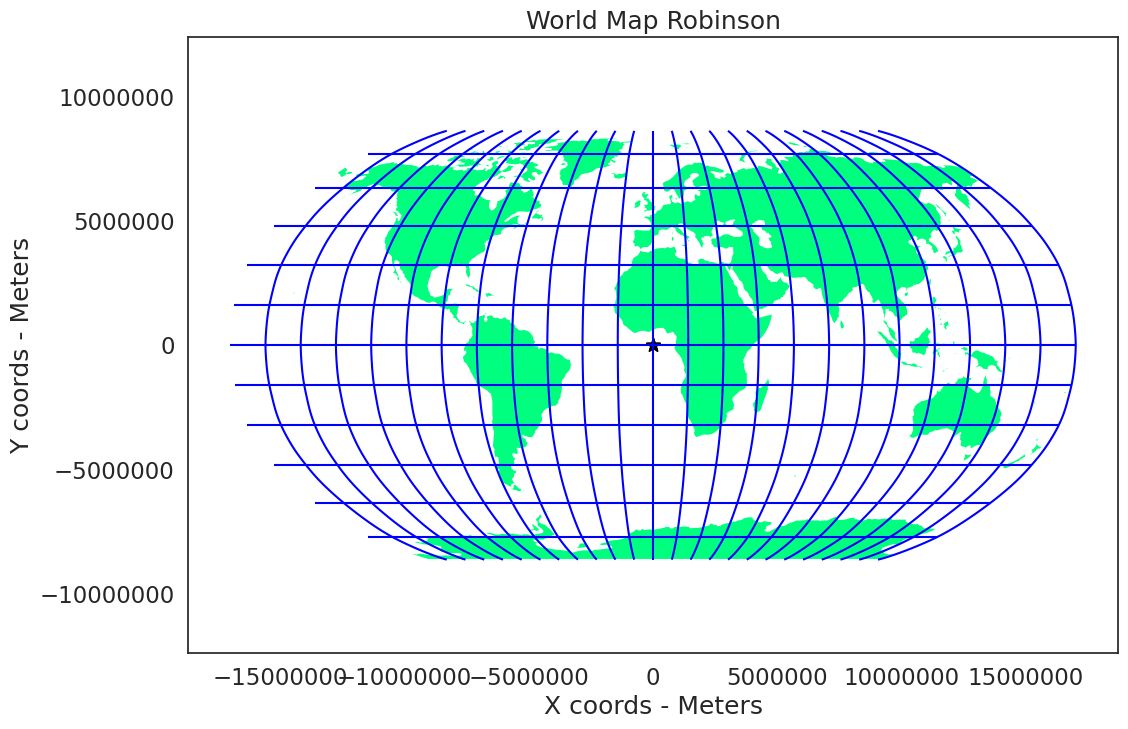

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax, color="springgreen")

graticule_robin.plot(ax=ax, color="blue")

city_locations.plot(ax=ax, marker="*", markersize=100, color="black")

ax.set(title="World Map Robinson", xlabel="X coords - Meters", ylabel="Y coords - Meters")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis("equal")
plt.show()

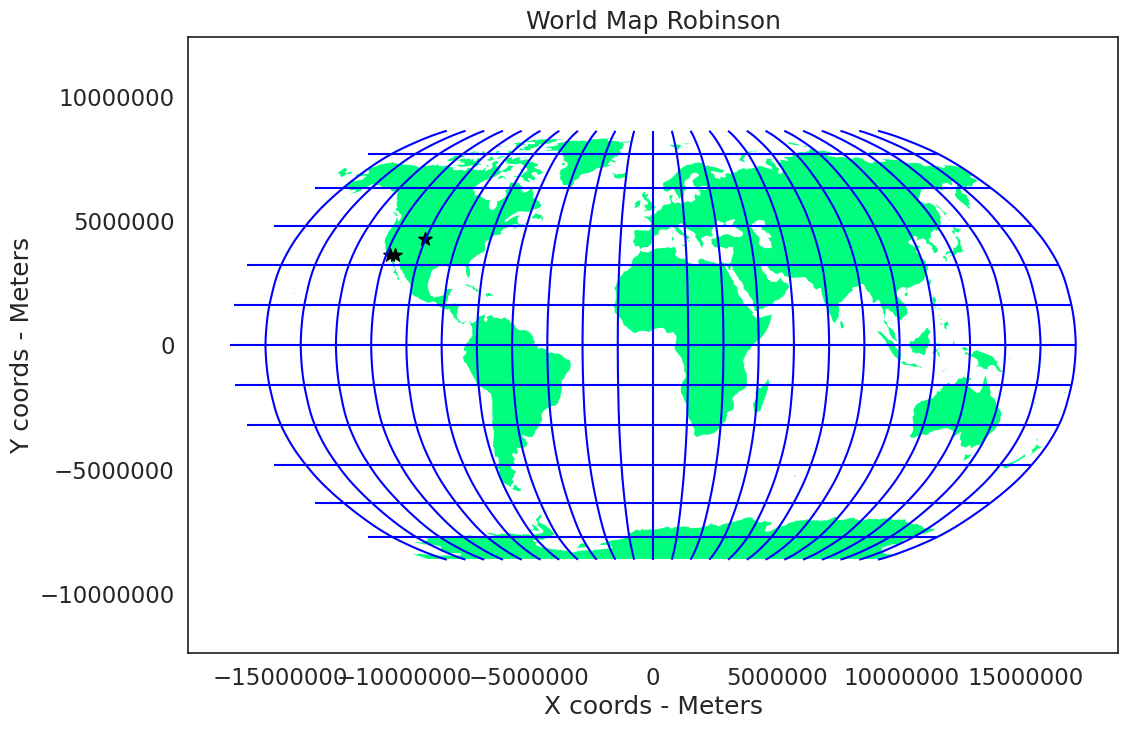

In [15]:
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(figsize=(12,8))

worldBound_robin.plot(ax=ax, color="springgreen")

graticule_robin.plot(ax=ax, color="blue")

city_locations_robin.plot(ax=ax, marker="*", markersize=100, color="black")

ax.set(title="World Map Robinson", xlabel="X coords - Meters", ylabel="Y coords - Meters")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis("equal")
plt.show()

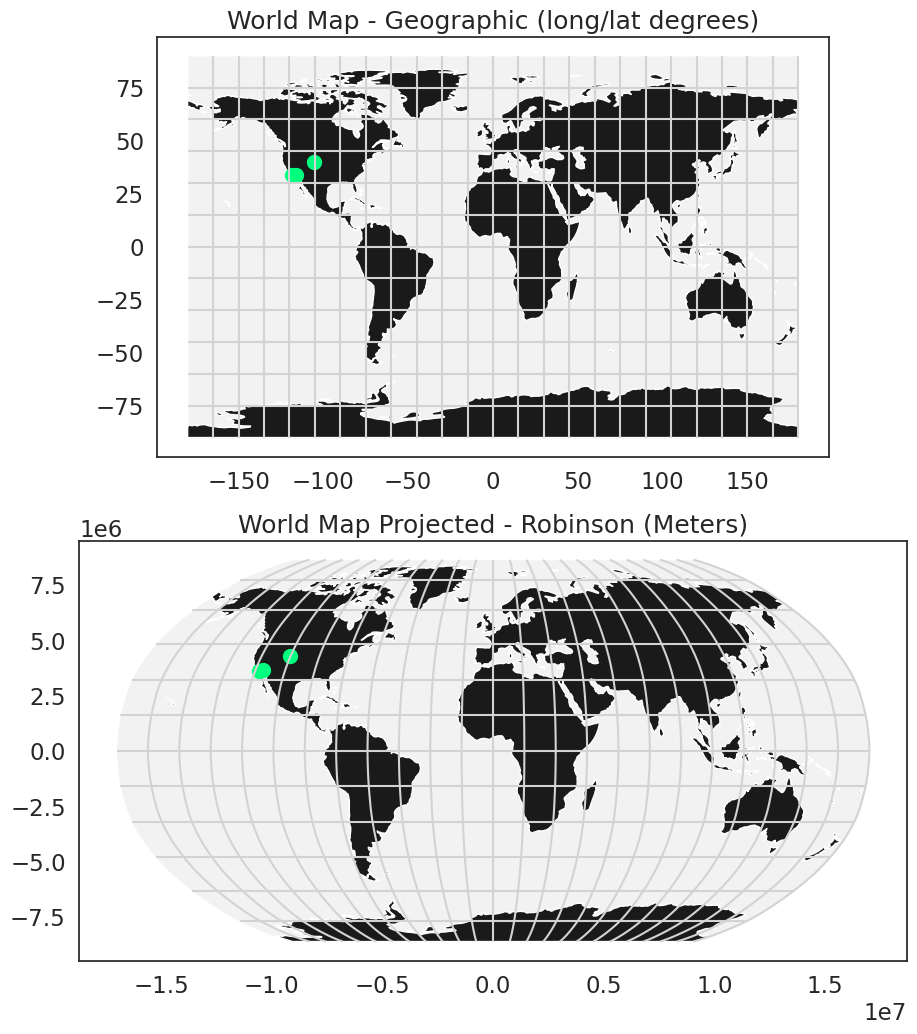

In [16]:
graticule_robinson = graticule.to_crs("+proj=robin")
bbox_robinson = bbox.to_crs("+proj=robin")

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# PLot 1
bbox.plot(ax=ax0, alpha=0.1, color="grey")
graticule.plot(ax=ax0, color="lightgrey")
worldBound.plot(ax=ax0, color="k")
city_locations.plot(ax=ax0, markersize=100, color="springgreen")
ax0.set(title="World Map - Geographic (long/lat degrees)")

# Plot 2
bbox_robinson.plot(ax=ax1, alpha=0.1, color="grey")
graticule_robinson.plot(ax=ax1, color="lightgrey")
worldBound_robin.plot(ax=ax1, color="k")
city_locations_robin.plot(ax=ax1, markersize=100, color="springgreen")
ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.show()